# Homework 6: Multiclass, Trees, Gradient Boosting

Student Name: Kuan-Lin Liu

Net ID: kll482

## 1 SGD for Multiclass Linear SVM

### 1.1

We wan to prove $J(w)$ is a convex function of $w$.

$$J(w) = \lambda ||w||^2 + \frac{1}{n}\sum_{i=1}^n max_{y \in \mathcal{Y}} [\Delta (y_i, y)+\langle w, \psi (x_i, y)-\psi(x_i, y_i)\rangle]$$

Proof:

* step 1:

According to Chapter 3.2.2 in [notes on Convex Optimization](https://davidrosenberg.github.io/mlcourse/Notes/convex-optimization.pdf), 

we know $[\Delta (y_i, y)+\langle w, \psi (x_i, y)-\psi(x_i, y_i)\rangle]$ is an affine function of w. Then, we know $[\Delta (y_i, y)+\langle w, \psi (x_i, y)-\psi(x_i, y_i)\rangle]$ is a convex function of $w$.

* step 2:

According to Chapter 3.2.4, we know the maximum of convex functions is convex.

$\therefore max_{y \in \mathcal{Y}}[\Delta (y_i, y)+\langle w, \psi (x_i, y)-\psi(x_i, y_i)\rangle]$ is also a convex function of $w$.

* step 3:

$\frac{1}{n} \sum_{i=1}^n max_{y \in \mathcal{Y}}[\Delta (y_i, y)+\langle w, \psi (x_i, y)-\psi(x_i, y_i)\rangle]$ is a combination of n convex functions, so it is also convex.

* step 4:

For the L2-norm, we need to prove $f(\theta x + (1-\theta)y) \leq \theta f(x) + (1-\theta)f(y)$.

Proof:

$\big[\theta f(x) + (1-\theta)f(y)\big]-\big[f(\theta x + (1-\theta)y)\big]$

$=\big[\theta ||w||^2+(1-\theta)||y||^2 \big]-\big[||\theta x + (1-\theta)y||^2\big]$

$=\theta ||x||^2+(1-\theta)||y||^2-\theta^2||X||^2-(1-\theta)^2||y||^2-2\theta(1-\theta)\cdot \langle x, y\rangle$

$\geq \theta(1-\theta)||x||^2+\theta(1-\theta)||y||^2-2\theta(1-\theta)\cdot||x||\cdot||y||$

$=\theta(1-\theta)\big(||x||-||y||\big)^2 \geq 0$

$\therefore$ we know $||w||^2$ is also convex

From step 1 to step 4, we know $J(w)$ is a combination of convex functions of $w$. Therefore, $J(w)$ is a convex function.

### 1.2

Let $z=w+v$, prove $J(z) \geq J(w) + g^T \cdot (z-w)$, where $g^T$ is a row vector.

$J(z)=J(w+v)$

$=\lambda ||w+v||^2 + \frac{1}{n}\sum_{i=1}^n max_{y\in Y}\big[\Delta (y_i, y)+\big<w+v, \psi(x_i, \hat{y_i})-\psi(x_i, y_i)\big>\big]$

$\geq \lambda\big[||w||^2+||v||^2+2w^Tv\big]+\frac{1}{n}\sum_{i=1}^n \big[\Delta (y_i, y)+\big<w, \psi(x_i, \hat{y_i})-\psi(x_i, y_i)\big>\big]+\frac{1}{n}\sum_{i=1}^n \big[\big<v, \psi(x_i, \hat{y_i})-\psi(x_i, y_i)\big>\big]$

$=\lambda||w||^2+\frac{1}{n}\sum_{i=1}^n \big[\Delta (y_i, y)+\big<w, \psi(x_i, \hat{y_i})-\psi(x_i, y_i)\big>\big]+\lambda ||v||^2 + 2\lambda w^Tv + \frac{1}{n}\sum_{i=1}^n max_{y\in Y}\big[\big<v, \psi(x_i, \hat{y_i})-\psi(x_i, y_i)\big>\big]$

$=J(w)+\lambda ||v||^2 + g^T\cdot v$, where $g^T=2\lambda w^T + \frac{1}{n}\sum_{i=1}^n\big[\psi(x_i, \hat{y_i})-\psi(x_i, y_i)\big]$

$\geq J(w)+g^T \cdot v$

Proved. We get $g^T=2\lambda w^T + \frac{1}{n}\sum_{i=1}^n \big[\psi(x_i, \hat{y_i})-\psi(x_i, y_i)\big]$.

### 1.3

In the stochastic subgradient descent, we update the weight based on each data point.

Therefore, we can remove the summation symbol from 1.2

We will get $g_i^T=2\lambda w^T + \big[\psi(x_i, \hat{y_i})-\psi(x_i, y_i)\big]$.

### 1.4

In the minibatch subgradient, we use m points instead of n points  (m<n) to update the weights.

Therefore, we can re-write $g^T$ to $2\lambda w^T + \frac{1}{m}\sum_{i=1}^m \big[\psi(x_i, \hat{y_i})-\psi(x_i, y_i)\big]$.

## 2 [Optional] Hinge Loss is a Special Case of Generalized Hinge Loss

* Condition 1: y=1:

If $y=1$ and $y'=-1$, we have $\Delta (y, y')=1$ and $h(x, y')-h(x, y)=-\frac{g(x)}{2}-(\frac{g(x)}{2})=-g(x)$.

After computation, we get $[\Delta(y, y')+h(x, y')-h(x, y)]=1-g(x)$

If $y=1$ and $y'=1$, we have $\Delta (y, y')=0$ and $h(x, y')-h(x, y)=-\frac{g(x)}{2}-(\frac{g(x)}{2})=0$.

After computation, we get $[\Delta(y, y')+h(x, y')-h(x, y)]=0$

$\therefore max_{y' \in \mathcal{Y}}[\Delta(y, y')+h(x, y')-h(x, y)]=max{0, 1-yg(x)}=1-g(x)$

* Condition 2: y=-1:

If $y=-1$ and $y'=1$, we have $\Delta (y, y')=1$ and $h(x, y')-h(x, y)=\frac{g(x)}{2}-(-\frac{g(x)}{2})=-g(x)$.

After computation, we get $[\Delta(y, y')+h(x, y')-h(x, y)]=1+g(x)$

If $y=-1$ and $y'=-1$, we have $\Delta (y, y')=0$ and $h(x, y')-h(x, y)=-\frac{g(x)}{2}-(\frac{g(x)}{2})=0$.

After computation, we get $[\Delta(y, y')+h(x, y')-h(x, y)]=0$

$\therefore max_{y' \in \mathcal{Y}}[\Delta(y, y')+h(x, y')-h(x, y)]=max{0, 1-yg(x)}=1+g(x)$

Proved.

## 3 Multiclass Classification - Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


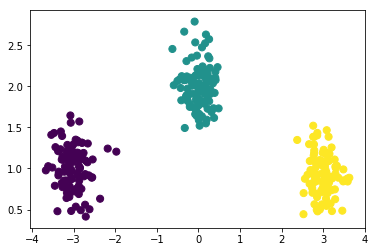

In [2]:
# Create the  training data
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

### 3.1 One-vs-All (also known as One-vs-Rest)

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone

class OneVsAllClassifier(BaseEstimator, ClassifierMixin):  
    """
    One-vs-all classifier
    We assume that the classes will be the integers 0,..,(n_classes-1).
    We assume that the estimator provided to the class, after fitting, has a "decision_function" that 
    returns the score for the positive class.
    """
    def __init__(self, estimator, n_classes):      
        """
        Constructed with the number of classes and an estimator (e.g. an
        SVM estimator from sklearn)
        @param estimator : binary base classifier used
        @param n_classes : number of classes
        """
        self.n_classes = n_classes 
        self.estimators = [clone(estimator) for _ in range(n_classes)]
        self.fitted = False

    def fit(self, X, y=None):
        """
        This should fit one classifier for each class.
        self.estimators[i] should be fit on class i vs rest
        @param X: array-like, shape = [n_samples,n_features], input data
        @param y: array-like, shape = [n_samples,] class labels
        @return returns self
        """
        #Your code goes here
        for cls, estimator in enumerate(self.estimators):
            # cls is a element of [0, 1, ..., (n_classes-1)]
            binary_y = np.zeros(len(y))
            binary_y[y==cls] = 1.0 # 1 vs. rest
            # fit the estimator by X and the binary y
            estimator.fit(X, binary_y)
        self.fitted = True  
        return self   

    def decision_function(self, X):
        """
        Returns the score of each input for each class. Assumes
        that the given estimator also implements the decision_function method (which sklearn SVMs do), 
        and that fit has been called.
        @param X : array-like, shape = [n_samples, n_features] input data
        @return array-like, shape = [n_samples, n_classes]
        """
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")

        if not hasattr(self.estimators[0], "decision_function"):
            raise AttributeError(
                "Base estimator doesn't have a decision_function attribute.")
        
        #Replace the following return statement with your code
        # initialize the return 2D-array as decision_matrix
        n_samples = X.shape[0]
        decision_matrix = np.zeros((n_samples, self.n_classes))
        
        # compute the result by the estimator's decision function after FITTED
        for cls, estimator in enumerate(self.estimators):
            decision_matrix[:, cls] = estimator.decision_function(X)
        return decision_matrix
    
    def predict(self, X):
        """
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples,n_features] input data
        @returns array-like, shape = [n_samples,] the predicted classes for each input
        """
        #Replace the following return statement with your code
        decision_matrix = self.decision_function(X)
        pred_cls = []
        for row in range(decision_matrix.shape[0]):
            pred_cls.append(np.argmax(decision_matrix[row]))
        return np.array(pred_cls)
 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Coeffs 0
[[-1.05852747 -0.90296521]]
Coeffs 1
[[ 0.22117096 -0.38900908]]
Coeffs 2
[[ 0.89162796 -0.82467394]]


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]])

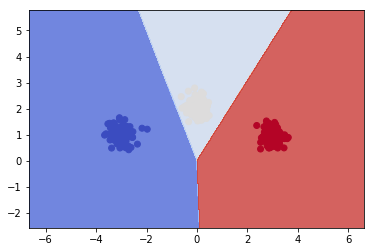

In [4]:
#Here we test the OneVsAllClassifier
from sklearn import svm
svm_estimator = svm.LinearSVC(loss='hinge', fit_intercept=False, C=200)
clf_onevsall = OneVsAllClassifier(svm_estimator, n_classes=3)
clf_onevsall.fit(X,y)

for i in range(3) :
    print("Coeffs %d"%i)
    print(clf_onevsall.estimators[i].coef_) #Will fail if you haven't implemented fit yet

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, clf_onevsall.predict(X))

### 3.2 Multiclass SVM

From Question 1.3,

We obstain the expression of the stochastic subgradient, 

$$g_i^T=2\lambda w^T + \big[\psi(x_i, \hat{y_i})-\psi(x_i, y_i)\big]$$

To compute $y_i$, we use the following equation: 

$$f_w(x)= \mathop{\arg\max}_{y\in Y}\langle w, \psi(x, y)\rangle$$ 

After computing the weights from SGD, we would use the final weight vector to make prediction. The predictor is:

$$h_w(x) = \mathop{\arg\max}_{y\in Y}\langle w,\psi(x,y)\rangle$$

In [5]:
def zeroOne(y,a) :
    '''
    Computes the zero-one loss.
    @param y: output class
    @param a: predicted class
    @return 1 if different, 0 if same
    '''
    return int(y != a)

def featureMap(X,y,num_classes) :
    '''
    Computes the class-sensitive features.
    @param X: array-like, shape = [n_samples,n_inFeatures] or [n_inFeatures,], input features for input data
    @param y: scaler or array-like: the target class (in range 0,..,num_classes-1)
    @return array-like, shape = [n_samples,n_outFeatures], the class sensitive features for class y
    '''
    #The following line handles X being a 1d-array or a 2d-array
    num_samples, num_inFeatures = (1,X.shape[0]) if len(X.shape) == 1 else (X.shape[0],X.shape[1])
    #your code goes here, and replaces following return
    # initialize
    num_outFeatures = num_inFeatures * num_classes
    
    # remember to deal with the problem when num_samples is 1
    # return a 1D array
    matrix_return = np.zeros(num_outFeatures)
    if num_samples == 1:
        matrix_return[y*num_inFeatures:(y+1)*num_inFeatures] = X
        return matrix_return # 1D array
    
    matrix_return = np.zeros((num_samples, num_outFeatures))
    for row_index, row in enumerate(X):
        y_row = y[row_index] # the y value of this row
        matrix_return[row_index, y_row*num_inFeatures:(y_row+1)*num_inFeatures] = row 
        # e.g. row1: (x1,x2,0,0,0,0); (0,0,x1,x2,0,0); (0,0,0,0,x1,x2) 
    return matrix_return # 2D array

def sgd(X, y, num_outFeatures, subgd, eta = 0.1, T = 10000):
    '''
    Runs STOCHASTIC subgradient descent, and outputs resulting parameter vector.
    @param X: array-like, shape = [n_samples,n_features], input training data 
    @param y: array-like, shape = [n_samples,], class labels
    @param num_outFeatures: number of class-sensitive features
    @param subgd: function taking x,y and giving subgradient of objective
    @param eta: learning rate for SGD
    @param T: maximum number of iterations
    @return: vector of weights
    '''
    num_samples = X.shape[0]
    #your code goes here and replaces following return statement
    # refer to  Understanding Machine Learning: From Theory to Algorithms Chapter 17.2
    w = np.zeros(num_outFeatures)
    w_sum = np.zeros(num_outFeatures) # for computing average of weights at the end
    for _ in range(T):
        rand_row = np.random.randint(num_samples) # randomly pick a row for stochastic subgradient
        x_i, y_i = X[rand_row], y[rand_row]
        # compute subgradient and update weights
        v_t = subgd(x_i, y_i, w) 
        w -= eta*v_t
        w_sum += w # add w into w_sum
    return w_sum/T # length: num_outFeatures

class MulticlassSVM(BaseEstimator, ClassifierMixin):
    '''
    Implements a Multiclass SVM estimator.
    '''
    def __init__(self, num_outFeatures, lam=1.0, num_classes=3, Delta=zeroOne, Psi=featureMap):       
        '''
        Creates a MulticlassSVM estimator.
        @param num_outFeatures: number of class-sensitive features produced by Psi
        @param lam: l2 regularization parameter
        @param num_classes: number of classes (assumed numbered 0,..,num_classes-1)
        @param Delta: class-sensitive loss function taking two arguments (i.e., target margin)
        @param Psi: class-sensitive feature map taking two arguments
        '''
        self.num_outFeatures = num_outFeatures
        self.lam = lam
        self.num_classes = num_classes
        self.Delta = Delta
        self.Psi = lambda X,y : Psi(X,y,num_classes)
        self.fitted = False
    
    def subgradient(self,x,y,w):
        '''
        Computes the subgradient at a given data point x,y
        @param x: sample input
        @param y: sample class
        @param w: parameter vector
        @return returns subgradient vector at given x,y,w
        '''
        #Your code goes here and replaces the following return statement
        # first, comput y_hat
        objective_func_result = [w.dot(self.Psi(x, cls)) for cls in range(self.num_classes)]
        y_hat = np.argmax(objective_func_result) # extract index directly because y \in {0,1..., num_class-1}
        
        # compute subgradient
        subgrad = 2*self.lam*w.T + self.Psi(x, y_hat)-self.Psi(x, y) # w == w.T because w is a 1-D array
        return subgrad
        
    def fit(self,X,y,eta=0.1,T=10000):
        '''
        Fits multiclass SVM
        @param X: array-like, shape = [num_samples,num_inFeatures], input data
        @param y: array-like, shape = [num_samples,], input classes
        @param eta: learning rate for SGD
        @param T: maximum number of iterations
        @return returns self
        '''
        self.coef_ = sgd(X,y,self.num_outFeatures,self.subgradient,eta,T)
        self.fitted = True
        return self
    
    def decision_function(self, X):
        '''
        Returns the score on each input for each class. Assumes
        that fit has been called.
        @param X : array-like, shape = [n_samples, n_inFeatures]
        @return array-like, shape = [n_samples, n_classes] giving scores for each sample,class pairing
        '''
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")

        #Your code goes here and replaces following return statement
        # initialize the decision_y matrix; decision_y is a 2D num_samples * num_classes array
        num_samples = X.shape[0]
        decision_matrix_T = np.array([self.Psi(X, [cls]*num_samples).dot(self.coef_) for cls in range(self.num_classes)]) # num_classes * num_samples
        return decision_matrix_T.T
            
    def predict(self, X):
        '''
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples, n_inFeatures], input data to predict
        @return array-like, shape = [n_samples,], class labels predicted for each data point
        '''

        #Your code goes here and replaces following return statement
        decision_matrix = self.decision_function(X)
        pred_cls = []
        for row in range(decision_matrix.shape[0]):
            pred_cls.append(np.argmax(decision_matrix[row]))
        return np.array(pred_cls)

w:
[-0.0378095  -0.00468876  0.00134611  0.00994254  0.03646339 -0.00525378]


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]])

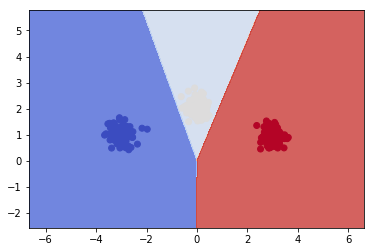

In [6]:
#the following code tests the MulticlassSVM and sgd
#will fail if MulticlassSVM is not implemented yet
est = MulticlassSVM(6,lam=1)
est.fit(X,y)
print("w:")
print(est.coef_)
Z = est.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, est.predict(X))

## 4 Decision Tree Implementation

In [7]:
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz

from IPython.display import Image

%matplotlib inline

### Load Data

In [8]:
data_train = np.loadtxt('code/svm-train.txt')
data_test = np.loadtxt('code/svm-test.txt')
x_train, y_train = data_train[:, 0: 2], data_train[:, 2].reshape(-1, 1)
x_test, y_test = data_test[:, 0: 2], data_test[:, 2].reshape(-1, 1)

In [9]:
# Change target to 0-1 label
y_train_label = np.array(list(map(lambda x: 1 if x > 0 else 0, y_train))).reshape(-1, 1)

### Decision Tree Class

In [10]:
class Decision_Tree(BaseEstimator):
     
    def __init__(self, split_loss_function, leaf_value_estimator,
                 depth=0, min_sample=5, max_depth=10):
        '''
        Initialize the decision tree classifier

        :param split_loss_function: method for splitting node
        :param leaf_value_estimator: method for estimating leaf value
        :param depth: depth indicator, default value is 0, representing root node
        :param min_sample: an internal node can be splitted only if it contains points more than min_smaple
        :param max_depth: restriction of tree depth.
        '''
        self.split_loss_function = split_loss_function
        self.leaf_value_estimator = leaf_value_estimator
        self.depth = depth
        self.min_sample = min_sample
        self.max_depth = max_depth

    def fit(self, X, y=None):
        '''
        This should fit the tree classifier by setting the values self.is_leaf, 
        self.split_id (the index of the feature we want ot split on, if we're splitting),
        self.split_value (the corresponding value of that feature where the split is),
        and self.value, which is the prediction value if the tree is a leaf node.  If we are 
        splitting the node, we should also init self.left and self.right to be Decision_Tree
        objects corresponding to the left and right subtrees. These subtrees should be fit on
        the data that fall to the left and right,respectively, of self.split_value.
        This is a recurisive tree building procedure. 
        
        :param X: a numpy array of training data, shape = (n, m)
        :param y: a numpy array of labels, shape = (n, 1)

        :return self
        '''
        # Your code goes here
        # remember to set self.is_leaf, self.split_id,  self.split_value,
        # self.value, self.left, self.right
        
        # initialize
        n, d = X.shape[0], X.shape[1]
        min_loss = self.split_loss_function(y) # initialize a minimal loss, we will update it later
        best_flag = None # for marking the best splitting point (flag)
        best_index_order = None # for marking the order of the X, y matrix with the best loss
        
        ### step 1: check pruning:  self.min_sample; self.max_depth ###
        # 1. threshold for pruning, this is the leaf
        if n <= self.min_sample or self.depth == self.max_depth:
            self.is_leaf = True
            self.value = self.leaf_value_estimator(y)
            return self
        
        ### step 2: if not a leaf, keep splitting the parent nodes of the subtree ###
        self.is_leaf = False
        # brute-force on each feature, d
        for dim in range(d):
            # sort X by dim
            index_order = np.argsort(X[:, dim]) # get the ordered index
            X_sorted, y_sorted = X[index_order], y[index_order]
            # find the splitting flag among sorted data points
            # there are n-1 gaps in n data points
            for flag in range(n-1):
                # current loss
                curr_loss = ((flag+1)*self.split_loss_function(y_sorted[:flag+1]) + (n-flag-1)*self.split_loss_function(y_sorted[flag+1:])) / len(y_sorted)
                if curr_loss < min_loss:
                    # update min_loss
                    min_loss = curr_loss
                    self.split_id = dim
                    self.split_value = (X_sorted[flag, dim] + X_sorted[flag+1, dim])/2
                    # mark the best flag for further discuss
                    best_flag = flag
                    best_index_order = index_order

        ### step 3: use RECURSION to build the left and right subtrees ###
        # after finding the best flag for this feature, we continue the subtree
        if best_flag != None: # be careful for best_flag == 0
            # initialize
            # left subtree
            self.left = Decision_Tree(self.split_loss_function,
                                      self.leaf_value_estimator,
                                      self.depth+1,
                                      self.min_sample,
                                      self.max_depth)
            # right subtree
            self.right = Decision_Tree(self.split_loss_function,
                                      self.leaf_value_estimator,
                                      self.depth+1,
                                      self.min_sample,
                                      self.max_depth)
            # initialize left X, left y, right X, right y
            X_best_sorted = X[best_index_order]
            y_best_sorted = y[best_index_order]
            # fit left subtree
            self.left.fit(X_best_sorted[:best_flag+1], y_best_sorted[:best_flag+1])
            # fit right subtree
            self.right.fit(X_best_sorted[best_flag+1:], y_best_sorted[best_flag+1:])
        else:
            self.is_leaf = True
            self.value = self.leaf_value_estimator(y)
        return self

    def predict_instance(self, instance):
        '''
        Predict label by decision tree

        :param instance: a numpy array with new data, shape (1, m)

        :return whatever is returned by leaf_value_estimator for leaf containing instance
        '''
        if self.is_leaf:
            return self.value
        
        if instance[self.split_id] <= self.split_value:
            return self.left.predict_instance(instance)
        else:
            return self.right.predict_instance(instance)

### Decision Tree Classifier

In [11]:
from collections import Counter

$$entropy = -\sum_{i=1}^c P(A_i) \cdot \log_2 P(A_i)$$

$$gini = 1 - \sum_{i=1}^c P(A_i)^2 $$

In [12]:
def compute_entropy(label_array):
    '''
    Calulate the entropy of given label list
    
    :param label_array: a numpy array of labels shape = (n, 1)
    :return entropy: entropy value
    '''
    # Your code goes here
    num_samples = label_array.shape[0]
    label_array_1D = label_array.reshape(num_samples) # 2D->1D
    cls_count_dict = Counter(label_array_1D) # dictionary: key=class; value=count
    counts = np.array([cts for cts in cls_count_dict.values()]) # counts for each class
    prob = counts/num_samples # an array of probability
    entropy = -prob.dot(np.log2(prob))
    return entropy

def compute_gini(label_array):
    '''
    Calulate the gini index of label list
    
    :param label_array: a numpy array of labels shape = (n, 1)
    :return gini: gini index value
    '''
    # Your code goes here
    num_samples = label_array.shape[0]
    label_array_1D = label_array.reshape(num_samples) # 2D->1D
    cls_count_dict = Counter(label_array_1D) # dictionary: key=class; value=count
    counts = np.array([cts for cts in cls_count_dict.values()]) # counts for each class
    prob = counts/num_samples # an array of probability
    gini = 1-np.sum(np.square(prob))
    return gini

In [13]:
def most_common_label(y):
    '''
    Find most common label
    '''
    label_cnt = Counter(y.reshape(len(y)))
    label = label_cnt.most_common(1)[0][0]
    return label

In [14]:
class Classification_Tree(BaseEstimator, ClassifierMixin):

    loss_function_dict = {
        'entropy': compute_entropy,
        'gini': compute_gini
    }

    def __init__(self, loss_function='entropy', min_sample=5, max_depth=10):
        '''
        :param loss_function(str): loss function for splitting internal node
        '''

        self.tree = Decision_Tree(self.loss_function_dict[loss_function],
                                most_common_label,
                                0, min_sample, max_depth)

    def fit(self, X, y=None):
        self.tree.fit(X,y)
        return self

    def predict_instance(self, instance):
        value = self.tree.predict_instance(instance)
        return value

### Decision Tree Boundary

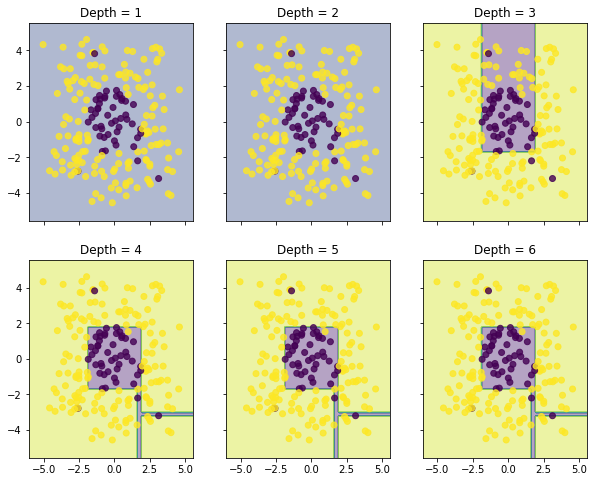

In [15]:
# Training classifiers with different depth
clf1 = Classification_Tree(max_depth=1)
clf1.fit(x_train, y_train_label)

clf2 = Classification_Tree(max_depth=2)
clf2.fit(x_train, y_train_label)

clf3 = Classification_Tree(max_depth=3)
clf3.fit(x_train, y_train_label)

clf4 = Classification_Tree(max_depth=4)
clf4.fit(x_train, y_train_label)

clf5 = Classification_Tree(max_depth=5)
clf5.fit(x_train, y_train_label)

clf6 = Classification_Tree(max_depth=6)
clf6.fit(x_train, y_train_label)


# Plotting decision regions
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1, 2]),
                        [clf1, clf2, clf3, clf4, clf5, clf6],
                        ['Depth = {}'.format(n) for n in range(1, 7)]):
    
    Z = np.array([clf.predict_instance(x) for x in np.c_[xx.ravel(), yy.ravel()]])

    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x_train[:, 0], x_train[:, 1], c=y_train_label.reshape(-1), alpha=0.8) #c
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### Compare decision tree with tree model in sklearn

In [16]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)
clf.fit(x_train, y_train_label)
export_graphviz(clf, out_file='tree_classifier.dot')

In [17]:
# Visualize decision tree
!dot -Tpng tree_classifier.dot -o tree_classifier.png

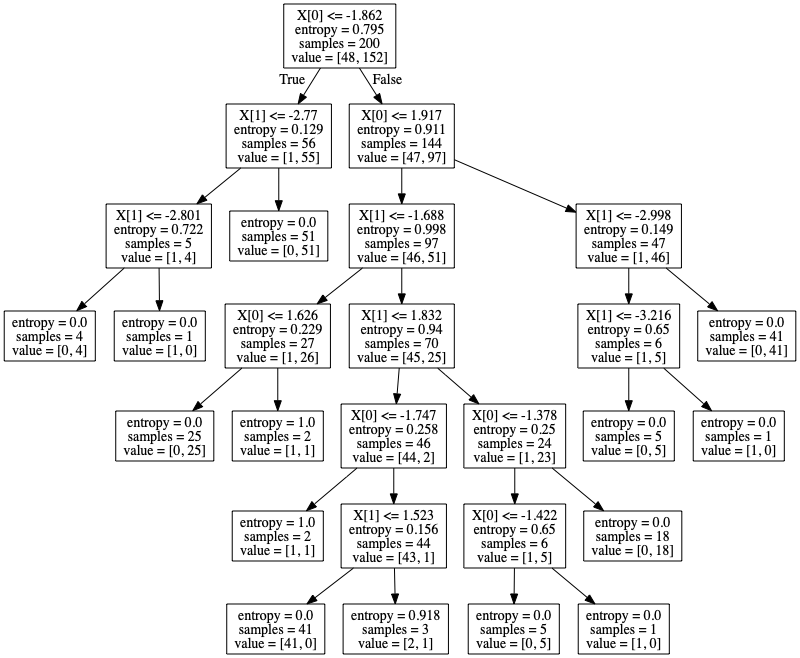

In [18]:
Image(filename='tree_classifier.png')

### Decision Tree Regressor

In [19]:
# Regression Tree Specific Code
def mean_absolute_deviation_around_median(y):
    '''
    Calulate the mean absolute deviation around the median of a given target list
    
    :param y: a numpy array of targets shape = (n, 1)
    :return mae
    '''
    # Your code goes here
    median = np.median(y)
    mae = np.mean(np.abs(y-median))
    return mae

In [20]:
class Regression_Tree():
    '''
    :attribute loss_function_dict: dictionary containing the loss functions used for splitting
    :attribute estimator_dict: dictionary containing the estimation functions used in leaf nodes
    '''

    loss_function_dict = {
        'mse': np.var,
        'mae': mean_absolute_deviation_around_median
    }

    estimator_dict = {
        'mean': np.mean,
        'median': np.median
    }
    
    def __init__(self, loss_function='mse', estimator='mean', min_sample=5, max_depth=10):
        '''
        Initialize Regression_Tree
        :param loss_function(str): loss function used for splitting internal nodes
        :param estimator(str): value estimator of internal node
        '''

        self.tree = Decision_Tree(self.loss_function_dict[loss_function],
                                  self.estimator_dict[estimator],
                                  0, min_sample, max_depth)

    def fit(self, X, y=None):
        self.tree.fit(X,y)
        return self

    def predict_instance(self, instance):
        value = self.tree.predict_instance(instance)
        return value

### Fit regression tree to one-dimensional regression data

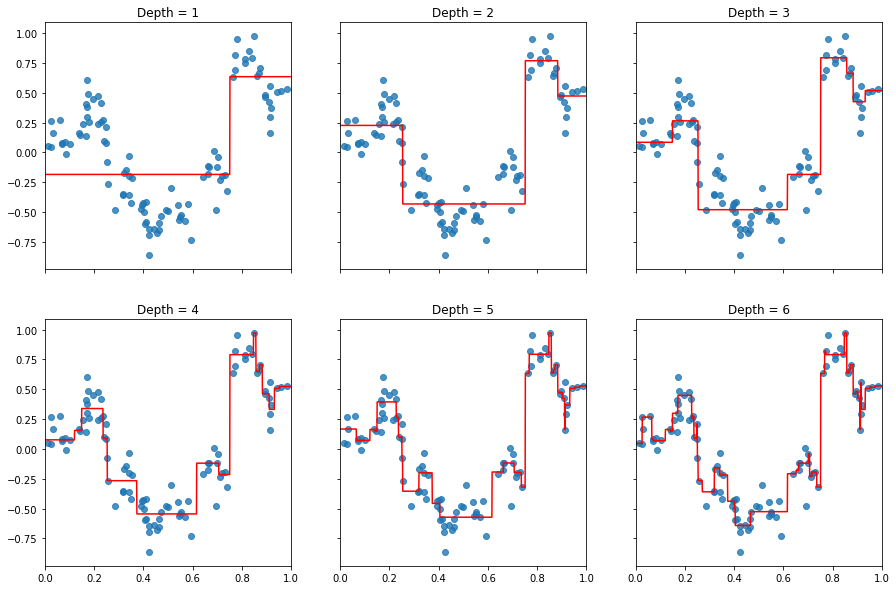

In [21]:
data_krr_train = np.loadtxt('code/krr-train.txt')
data_krr_test = np.loadtxt('code/krr-test.txt')
x_krr_train, y_krr_train = data_krr_train[:,0].reshape(-1,1),data_krr_train[:,1].reshape(-1,1)
x_krr_test, y_krr_test = data_krr_test[:,0].reshape(-1,1),data_krr_test[:,1].reshape(-1,1)

# Training regression trees with different depth
clf1 = Regression_Tree(max_depth=1,  min_sample=1, loss_function='mae', estimator='median')
clf1.fit(x_krr_train, y_krr_train)

clf2 = Regression_Tree(max_depth=2,  min_sample=1, loss_function='mae', estimator='median')
clf2.fit(x_krr_train, y_krr_train)

clf3 = Regression_Tree(max_depth=3,  min_sample=1, loss_function='mae', estimator='median')
clf3.fit(x_krr_train, y_krr_train)

clf4 = Regression_Tree(max_depth=4,  min_sample=1, loss_function='mae', estimator='median')
clf4.fit(x_krr_train, y_krr_train)

clf5 = Regression_Tree(max_depth=5,  min_sample=1, loss_function='mae', estimator='median')
clf5.fit(x_krr_train, y_krr_train)

clf6 = Regression_Tree(max_depth=6,  min_sample=1, loss_function='mae', estimator='median')
clf6.fit(x_krr_train, y_krr_train)

plot_size = 0.001
x_range = np.arange(0., 1., plot_size).reshape(-1, 1)

f2, axarr2 = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15, 10))

for idx, clf, tt in zip(product([0, 1], [0, 1, 2]),
                        [clf1, clf2, clf3, clf4, clf5, clf6],
                        ['Depth = {}'.format(n) for n in range(1, 7)]):

    y_range_predict = np.array([clf.predict_instance(x) for x in x_range]).reshape(-1, 1)
  
    axarr2[idx[0], idx[1]].plot(x_range, y_range_predict, color='r')
    axarr2[idx[0], idx[1]].scatter(x_krr_train, y_krr_train, alpha=0.8)
    axarr2[idx[0], idx[1]].set_title(tt)
    axarr2[idx[0], idx[1]].set_xlim(0, 1)
plt.show()

## 5 Gradient Boosting Machines

$$h_m=\mathop{\arg\min}_{h \in \mathcal{H}} \frac{1}{n}\sum_{i=1}^n\ell\big(y_i, f_{m-1}(x_i)+vh(x_i)\big)$$

$$=\mathop{\arg\min}_{h \in \mathcal{H}} \frac{1}{n}\sum_{i=1}^n \ln{\big[1+\exp{\big(y_i \cdot [f_{m-1}(x_i)+vh(x_i)]\big)\big]}}$$

## 6 Gradient Boosting Implementation

In [22]:
#Pseudo-residual function.
#Here you can assume that we are using L2 loss

def pseudo_residual_L2(train_target, train_predict):
    '''
    Compute the pseudo-residual based on current predicted value. 
    '''
    return train_target - train_predict

In [32]:
class gradient_boosting():
    '''
    Gradient Boosting regressor class
    :method fit: fitting model
    '''
    def __init__(self, n_estimator, pseudo_residual_func, learning_rate=0.1, min_sample=5, max_depth=3, loss_function="mse"):
        '''
        Initialize gradient boosting class
        
        :param n_estimator: number of estimators (i.e. number of rounds of gradient boosting)
        :pseudo_residual_func: function used for computing pseudo-residual
        :param learning_rate: step size of gradient descent
        '''
        self.n_estimator = n_estimator
        self.pseudo_residual_func = pseudo_residual_func
        self.learning_rate = learning_rate
        self.min_sample = min_sample
        self.max_depth = max_depth
        self.base_models = [] # for storing fitted the estimator which will be used in the testing step
        self.loss_function = loss_function # custom loss function
        
    def fit(self, train_data, train_target):
        '''
        Fit gradient boosting model
        train_data: X_train; 2D-array
        train_target: x_train; 2D-array
        '''
        # Your code goes here
        # initialize f_0
        f_0 = np.zeros(train_data.shape[0]) # 1D
        
        # transform train_target from a 2D array to a 1D array
        train_target_1D = train_target.reshape(-1)
        for _ in range(self.n_estimator): # number of interations
            # residual
            residual = self.pseudo_residual_func(train_target_1D, f_0)
            # use the residual in the next weak classifier
            # DecisionTreeRegressor's default is MSE. no need to change that for this question.
            h_m = DecisionTreeRegressor(criterion=self.loss_function, max_depth=self.max_depth, min_samples_leaf=self.min_sample)
            h_m.fit(train_data, residual)
            # use h_m's prediction to update f_0 in the m iteration
            # f_m = f_{m-1} + v_i*h_m
            f_0 = f_0 + self.learning_rate * h_m.predict(train_data)
            
            # save the estimator (weak classifier; our base model) in the t iteration
            self.base_models.append(h_m)
    
    def predict(self, test_data):
        '''
        Predict value
        '''
        # Your code goes here
        # initialize the f_0
        f_0 = np.zeros(test_data.shape[0])
    
        for t in range(len(self.base_models)):
            f_0 = f_0 + self.learning_rate*self.base_models[t].predict(test_data)
        
        # return the target vector at the final t step
        return f_0

### 2-D GBM visualization - SVM data

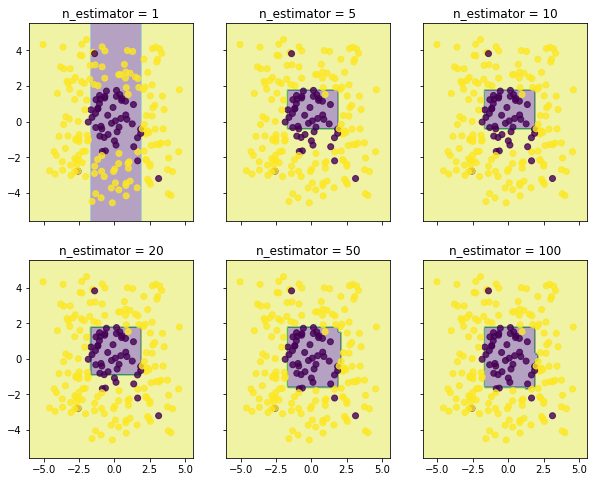

In [27]:
# Plotting decision regions
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(10, 8))

for idx, i, tt in zip(product([0, 1], [0, 1, 2]),
                       [1, 5, 10, 20, 50, 100], 
                       ['n_estimator = {}'.format(n) for n in [1, 5, 10, 20, 50, 100]]):
    
    gbt = gradient_boosting(n_estimator=i, pseudo_residual_func=pseudo_residual_L2, max_depth=2)  
    gbt.fit(x_train, y_train)
                   
    Z = np.sign(gbt.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    # y_train_label -> y_train_label.reshape(-1) for 2D -> 1D array
    axarr[idx[0], idx[1]].scatter(x_train[:, 0], x_train[:, 1], c=y_train_label.reshape(-1), alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

### 1-D GBM visualization - KRR data

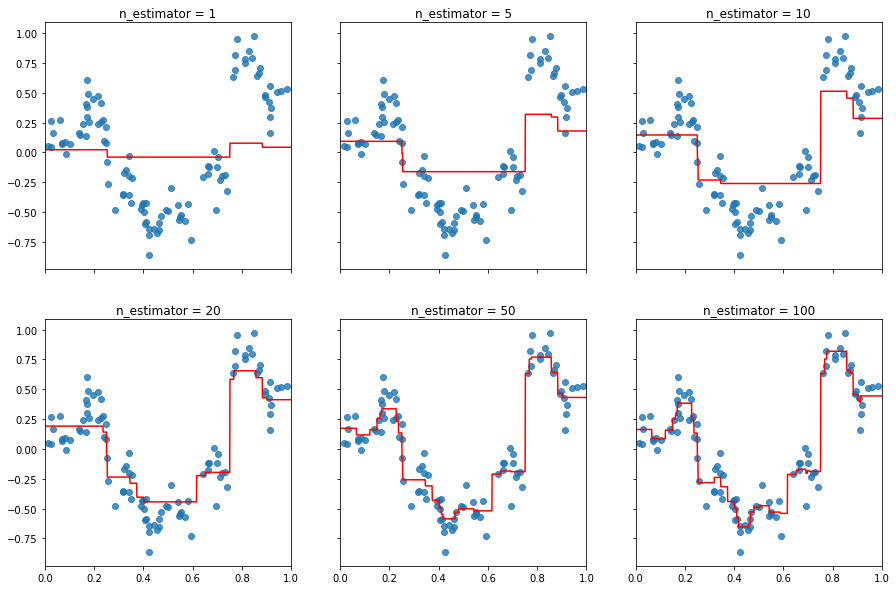

In [28]:
plot_size = 0.001
x_range = np.arange(0., 1., plot_size).reshape(-1, 1)

f2, axarr2 = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15, 10))

for idx, i, tt in zip(product([0, 1], [0, 1, 2]),
                       [1, 5, 10, 20, 50, 100], 
                       ['n_estimator = {}'.format(n) for n in [1, 5, 10, 20, 50, 100]]):
    
    gbm_1d = gradient_boosting(n_estimator=i, pseudo_residual_func=pseudo_residual_L2, max_depth=2)  
    gbm_1d.fit(x_krr_train, y_krr_train)
    
    y_range_predict = gbm_1d.predict(x_range)

    axarr2[idx[0], idx[1]].plot(x_range, y_range_predict, color='r')
    axarr2[idx[0], idx[1]].scatter(x_krr_train, y_krr_train, alpha=0.8)
    axarr2[idx[0], idx[1]].set_title(tt)
    axarr2[idx[0], idx[1]].set_xlim(0, 1)

### 6.2 

Let's try to use Mean Absolute Error as the loss function when training our GB model.

### 6.2 2-D GBM visualization - SVM data

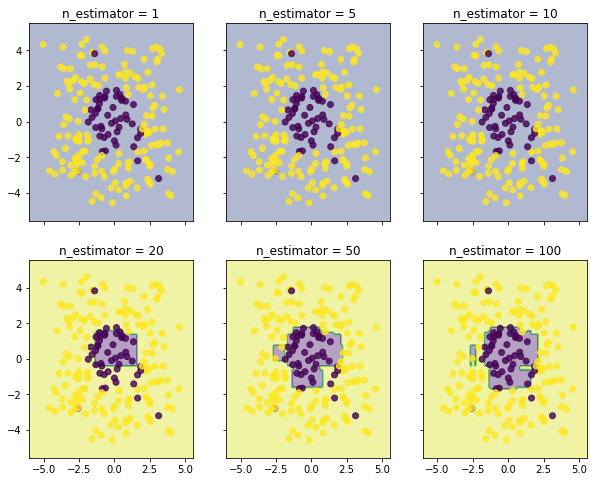

In [29]:
# Plotting decision regions
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(10, 8))

for idx, i, tt in zip(product([0, 1], [0, 1, 2]),
                       [1, 5, 10, 20, 50, 100], 
                       ['n_estimator = {}'.format(n) for n in [1, 5, 10, 20, 50, 100]]):
    
    gbt = gradient_boosting(n_estimator=i, pseudo_residual_func=pseudo_residual_L2, max_depth=2, loss_function="mae")  
    gbt.fit(x_train, y_train)
                   
    Z = np.sign(gbt.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    # y_train_label -> y_train_label.reshape(-1) for 2D -> 1D array
    axarr[idx[0], idx[1]].scatter(x_train[:, 0], x_train[:, 1], c=y_train_label.reshape(-1), alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

### 6.2 1-D GBM visualization - KRR data

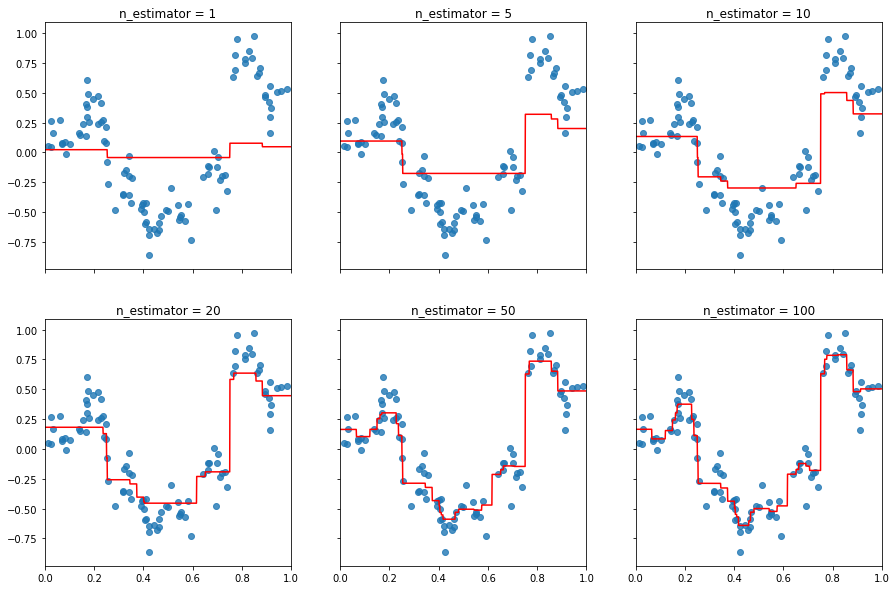

In [31]:
plot_size = 0.001
x_range = np.arange(0., 1., plot_size).reshape(-1, 1)

f2, axarr2 = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15, 10))

for idx, i, tt in zip(product([0, 1], [0, 1, 2]),
                       [1, 5, 10, 20, 50, 100], 
                       ['n_estimator = {}'.format(n) for n in [1, 5, 10, 20, 50, 100]]):
    
    gbm_1d = gradient_boosting(n_estimator=i, pseudo_residual_func=pseudo_residual_L2, max_depth=2, loss_function="mae")  
    gbm_1d.fit(x_krr_train, y_krr_train)
    
    y_range_predict = gbm_1d.predict(x_range)

    axarr2[idx[0], idx[1]].plot(x_range, y_range_predict, color='r')
    axarr2[idx[0], idx[1]].scatter(x_krr_train, y_krr_train, alpha=0.8)
    axarr2[idx[0], idx[1]].set_title(tt)
    axarr2[idx[0], idx[1]].set_xlim(0, 1)